In [1]:
# IMporting the Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection as ms
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names=[ 'Class','Alcohol','Malic_acid','Ash','Alkalinity_of_ash','Magnesium','Totalphenols','Flavanoids',
           'Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline'  ]

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=col_names, index_col=0)

data.reset_index(inplace=True)
data.head()

,Class,Alcohol,Malic_acid,Ash,Alkalinity_of_ash,Magnesium,Totalphenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Summary Statistics
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alkalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Totalphenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [4]:
# Data types f each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alkalinity_of_ash       178 non-null float64
Magnesium               178 non-null int64
Totalphenols            178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
# target column distribution
data.Class.value_counts()/178*100

2    39.887640
1    33.146067
3    26.966292
Name: Class, dtype: float64

Since the target variable distribution is almost equal for all three class , there is no need for imbalanced data treatment

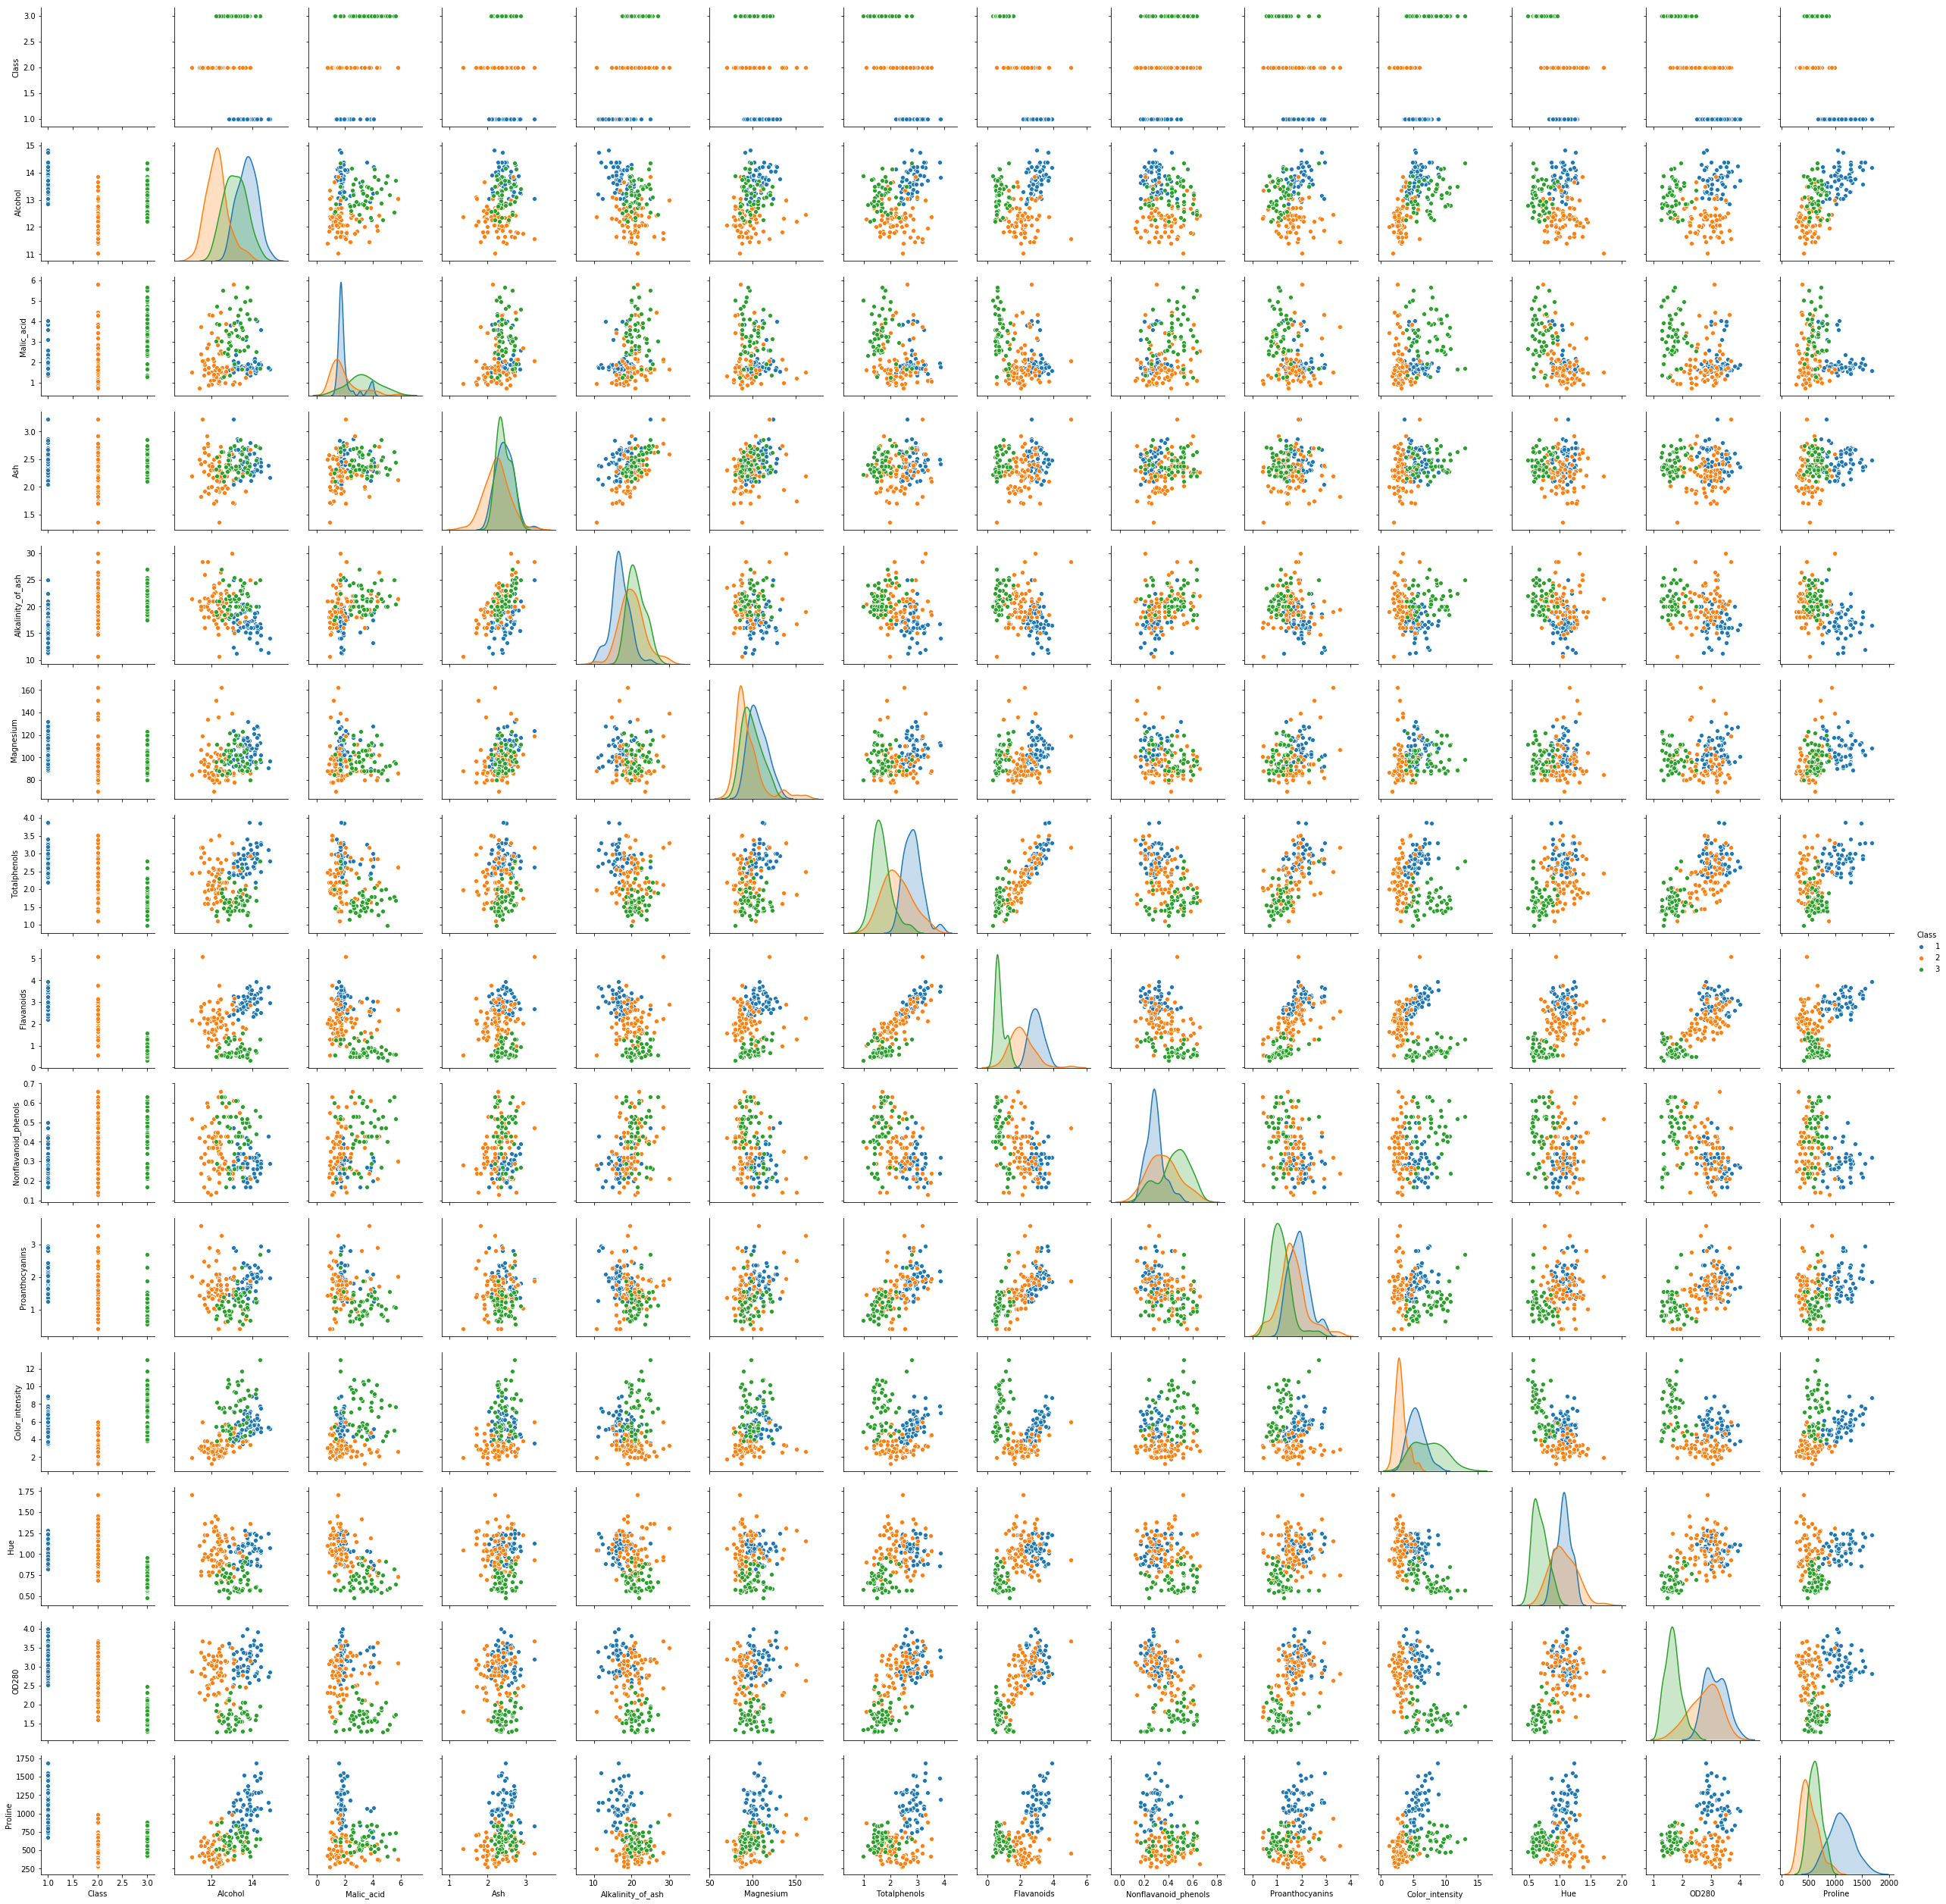

In [6]:
# pairplot
sns.pairplot(data,diag_kind='kde',hue='Class')
plt.show()

# Target variable Analysis

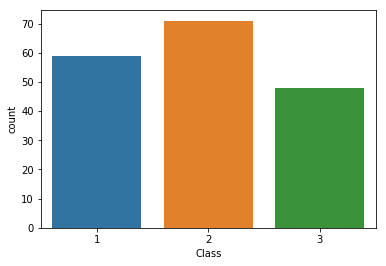

In [7]:
# Count plot for target variable
sns.countplot(data['Class'])
plt.show()

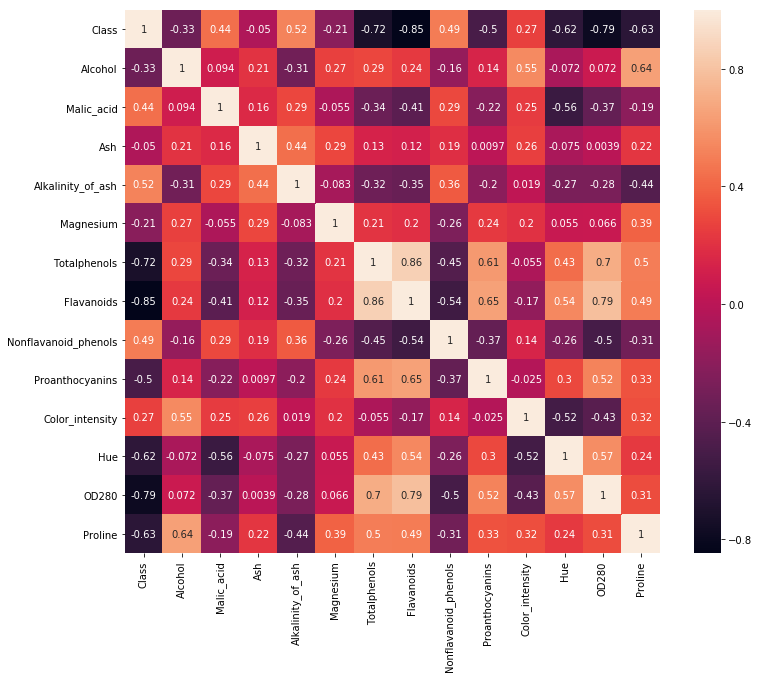

In [8]:
# Correlation Matrix
plt.figure(figsize=[12,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

# 1.	Standardize the d-dimensional dataset.

In [9]:
#IDv's and DV's
x=data.drop('Class',axis=1)
y=data.Class

In [10]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
# Standardize the train and test separately to avoid data leaks
sc=StandardScaler()
x_train_std=sc.fit_transform(xtrain)
x_test_std=sc.fit_transform(xtest)

# 2.	Construct the covariance matrix.

In [12]:
# Covarience Matrix for the standardized 
covar=np.cov(x_train_std.T)
covar.shape

(13, 13)

# 3.	Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [13]:
import numpy.linalg as la

In [14]:
# getting the eigen vector and eigen values

e_val,e_vec=la.eig(covar.T)
print("Eigen Values",e_val)
print("\nEigen Vectors",e_vec)

Eigen Values [4.60904624 2.58694581 1.48342648 1.01296796 0.80274502 0.67220992
 0.55435313 0.10226076 0.3440145  0.3179616  0.17356328 0.23908289
 0.20711346]

Eigen Vectors [[-0.09041052 -0.47673487  0.23238477 -0.00653254 -0.29432656 -0.34363734
   0.06596728  0.0281183  -0.5487824  -0.16437862 -0.17930546 -0.35824493
  -0.1094306 ]
 [ 0.25298779 -0.17699549 -0.14068315 -0.5915821   0.0014267  -0.25243728
  -0.54637842  0.00287271 -0.12771556 -0.03381388  0.17576542  0.296933
   0.19007123]
 [ 0.01602653 -0.3238999  -0.58906416  0.29652032 -0.11985095 -0.22936829
  -0.01699816 -0.14794401  0.14152571  0.01995435 -0.09288038  0.31429592
  -0.4928735 ]
 [ 0.23041073  0.02707893 -0.6268684  -0.04753301 -0.005842   -0.06910486
   0.38854038  0.13652709 -0.06603379 -0.24156097 -0.01366246 -0.27653291
   0.48700317]
 [-0.08008494 -0.38435766 -0.16065207  0.24327871  0.66735506  0.26975685
  -0.28356399  0.03581854 -0.23775869  0.20173778  0.07923595 -0.22597588
   0.08042495]
 [-0.4022693

In [15]:
# taking the absolute value for eiegn value to get the real part of the number
e_val=np.abs(e_val)
e_val

array([4.60904624, 2.58694581, 1.48342648, 1.01296796, 0.80274502,
       0.67220992, 0.55435313, 0.10226076, 0.3440145 , 0.3179616 ,
       0.17356328, 0.23908289, 0.20711346])

In [16]:
e_vec.shape

(13, 13)

## 4.	Select k eigenvectors that correspond to the k largest eigenvalues,  where k is the dimensionality of the new feature subspace ( k≤d ).

In [17]:
# Returns the indices that would sort an e_val.
idx=np.argsort(e_val)[::-1]
idx

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 12, 10,  7], dtype=int64)

In [18]:
# sorted Eigen vector
e_vec=e_vec[:,idx]
e_vec

array([[-0.09041052, -0.47673487,  0.23238477, -0.00653254, -0.29432656,
        -0.34363734,  0.06596728, -0.5487824 , -0.16437862, -0.35824493,
        -0.1094306 , -0.17930546,  0.0281183 ],
       [ 0.25298779, -0.17699549, -0.14068315, -0.5915821 ,  0.0014267 ,
        -0.25243728, -0.54637842, -0.12771556, -0.03381388,  0.296933  ,
         0.19007123,  0.17576542,  0.00287271],
       [ 0.01602653, -0.3238999 , -0.58906416,  0.29652032, -0.11985095,
        -0.22936829, -0.01699816,  0.14152571,  0.01995435,  0.31429592,
        -0.4928735 , -0.09288038, -0.14794401],
       [ 0.23041073,  0.02707893, -0.6268684 , -0.04753301, -0.005842  ,
        -0.06910486,  0.38854038, -0.06603379, -0.24156097, -0.27653291,
         0.48700317, -0.01366246,  0.13652709],
       [-0.08008494, -0.38435766, -0.16065207,  0.24327871,  0.66735506,
         0.26975685, -0.28356399, -0.23775869,  0.20173778, -0.22597588,
         0.08042495,  0.07923595,  0.03581854],
       [-0.40226932, -0.087816

In [19]:
# Sorted eigen value
e_val=e_val[idx]
e_val

array([4.60904624, 2.58694581, 1.48342648, 1.01296796, 0.80274502,
       0.67220992, 0.55435313, 0.3440145 , 0.3179616 , 0.23908289,
       0.20711346, 0.17356328, 0.10226076])

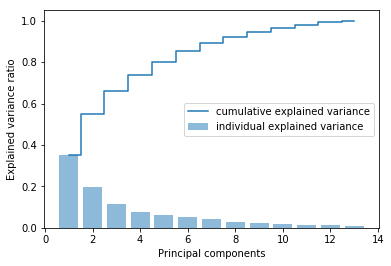

In [20]:
# finding the variance of each Principle Component
tot = sum(e_val)
var_exp = [(i / tot) for i in sorted(e_val, reverse=True)]

# Cumulative varience
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


# 5.	Construct a projection matrix W from the "top" k eigenvectors.

In [21]:
# combined matrix of Eigen vector
eig_matrix=[((e_val[i]),e_vec[:,i]) for i in range(len(e_val))]
eig_matrix

[(4.609046238846975,
  array([-0.09041052,  0.25298779,  0.01602653,  0.23041073, -0.08008494,
         -0.40226932, -0.43202681,  0.29396827, -0.30712828,  0.14263937,
         -0.32126087, -0.39611073, -0.24164525])),
 (2.5869458130040033,
  array([-0.47673487, -0.17699549, -0.3238999 ,  0.02707893, -0.38435766,
         -0.0878164 , -0.02713712, -0.01053185, -0.07541547, -0.48287748,
          0.2547302 ,  0.11157837, -0.40406288])),
 (1.483426477213807,
  array([ 0.23238477, -0.14068315, -0.58906416, -0.6268684 , -0.16065207,
         -0.1370189 , -0.12736772, -0.09888055, -0.18264994,  0.15871686,
         -0.06303092, -0.15071199,  0.17442128])),
 (1.0129679605341757,
  array([-0.00653254, -0.5915821 ,  0.29652032, -0.04753301,  0.24327871,
         -0.14810192, -0.11529495,  0.26650234, -0.4165868 , -0.06333815,
          0.4026246 , -0.11710444,  0.20246685])),
 (0.8027450209514816,
  array([-0.29432656,  0.0014267 , -0.11985095, -0.005842  ,  0.66735506,
         -0.21703103, 

In [22]:
# we are reducing to 2 Principle Components so we take 2 rows of eig_matrix 
w= np.hstack((eig_matrix[0][1][:, np.newaxis], eig_matrix[1][1][:, np.newaxis]))
w

array([[-0.09041052, -0.47673487],
       [ 0.25298779, -0.17699549],
       [ 0.01602653, -0.3238999 ],
       [ 0.23041073,  0.02707893],
       [-0.08008494, -0.38435766],
       [-0.40226932, -0.0878164 ],
       [-0.43202681, -0.02713712],
       [ 0.29396827, -0.01053185],
       [-0.30712828, -0.07541547],
       [ 0.14263937, -0.48287748],
       [-0.32126087,  0.2547302 ],
       [-0.39611073,  0.11157837],
       [-0.24164525, -0.40406288]])

# 6.	Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

In [23]:
x_train_std[0].dot(w)

array([0.95748971, 2.17579819])

In [24]:
x_train_std.shape

(124, 13)

In [25]:
w.shape

(13, 2)

In [26]:
X_train_pca = x_train_std.dot(w)
X_train_pca.shape

(124, 2)

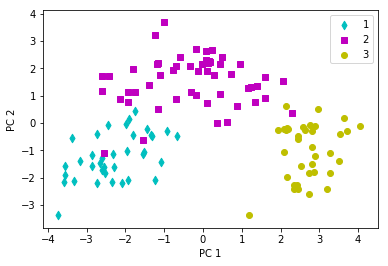

In [27]:
colors = ['c','m','y']
markers = ['d','s','o']
for l, c, m in zip(np.unique(ytrain), colors, markers):
     plt.scatter(X_train_pca[ytrain==l, 0],
     X_train_pca[ytrain==l, 1],
     c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()